In [77]:
# importing the basic libraries
# the given problem is regression problem
import pandas as pd
import numpy as np
zoo = pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [78]:
# discarding the first column as it is not required
Zoo=zoo.iloc[:,1:]

In [79]:
# splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
train,test = train_test_split(Zoo,test_size = 0.2) 


In [80]:
# importing the required libraries and applying KNN algorithm on training data
from sklearn.neighbors import KNeighborsClassifier as KNC

In [81]:
# finding out the best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])

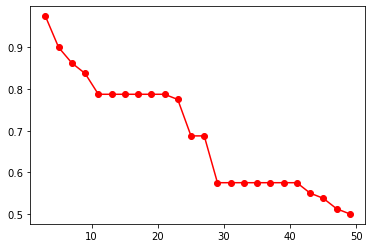

In [82]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

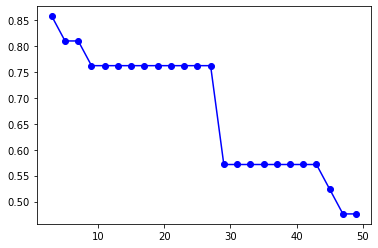

In [83]:
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

In [ ]:
# building the model
# from the above plots it is very clear that number of neighbors to best considered is 5
neigh = KNC(n_neighbors= 5)
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
train_acc = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
test_acc